<a href="https://colab.research.google.com/github/KOO-96/DNA_seminar/blob/main/DNA_ComputerVisionSeminar_Weeks3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weeks3
ImageNet Challenge 2014
1. VGG Net, GoogLeNet
- VGG Net

- GoogLeNet

- VGG Net
1. 가장 효율적인 모델을 만들기 -> layer 층 깊게 쌓기, 기울기 소실이 없는 모델 만들기

2. 3 X 3 filter 이용해 깊게 쌓기 -> ReLu를 3번을 쓸 수 있다., 학습 파라미터 수가 감소한다.

3. 1X1 Conv filter -> 비선형성을 가해줄 수 있는 방식.  weight 개수를 낮추어 준다.


## Weeks3 과제 solution.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 경로를 앞으로 진행할 프로젝트 디렉토리로 이동한다.
%cd /content/drive/MyDrive/CV_seminar_project 

/content/drive/MyDrive/CV_seminar_project


In [ ]:
# 현재 경로 확인.
%pwd

'/content/drive/MyDrive/CV_seminar_project'

In [ ]:
import glob

dolphin = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*.jpg')
shark = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*.jpg')
whale = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*.jpg')

dic = {'dolphin':dolphin, 'shark': shark, 'whale': whale}
for key in dic.keys():
  print(f'{key}이미지가 ',len(dic[key]), '개 있습니다.')
print('------------------------------------------------------------------------')

length_list = []
for key in dic.keys():
  print(f'{key}이미지는 trian, valid, test셋에 대해 ',int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1), '개씩 배정해주세요.')
  length_list.append([int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1)])

dolphin이미지가  373 개 있습니다.
shark이미지가  488 개 있습니다.
whale이미지가  451 개 있습니다.
------------------------------------------------------------------------
dolphin이미지는 trian, valid, test셋에 대해  261 74 37 개씩 배정해주세요.
shark이미지는 trian, valid, test셋에 대해  341 97 48 개씩 배정해주세요.
whale이미지는 trian, valid, test셋에 대해  315 90 45 개씩 배정해주세요.


## 직접 짠 코드.

----- 시각화 -----


<Figure size 720x720 with 0 Axes>

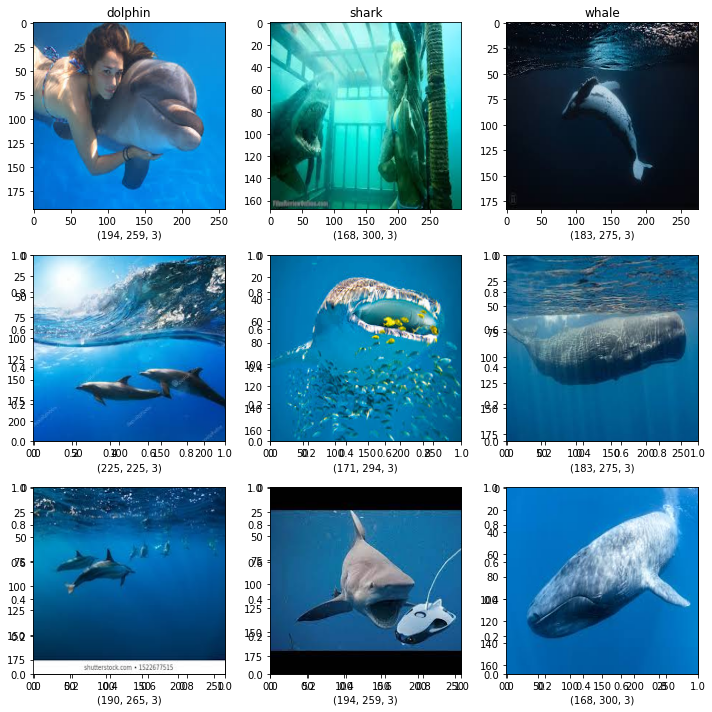

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow(img)가 안되므로 
from PIL import Image as PILImage
import random

fig = plt.figure(figsize=(10,10))

dolphin_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')
shark_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*')
whale_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*')

print('----- 시각화 -----')
new_list = []
dol_list, sh_list, wh_list = random.sample(dolphin_img_list,3), random.sample(shark_img_list,3), random.sample(whale_img_list,3)
new_list.append(dol_list) ; new_list.append(sh_list); new_list.append(wh_list)
new_list = sum(new_list,[])
new_list[1], new_list[2], new_list[3], new_list[5], new_list[6], new_list[7] = new_list[3], new_list[6], new_list[1], new_list[7], new_list[2], new_list[5]

rows = 3 ; columns = 3
fig, axes = plt.subplots(rows, columns, figsize = (10, 10))

for i in range(1, len(new_list)+1):
  fig.add_subplot(rows, columns, i)
  image = cv2.imread(new_list[i-1])
  image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image_2, aspect = 'auto')
  plt.xlabel(image_2.shape)
  names = ['dolphin', 'shark', 'whale']
  for idx, ax in enumerate(axes[0]):
    ax.set_title(names[idx])
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()

----- 픽셀 수정 -----


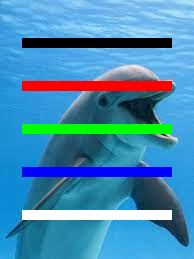

In [ ]:
print('----- 픽셀 수정 -----')
image = cv2.imread(dolphin_img_list[0])

for x1 in range(22,172):
  for y1 in range(38,48):
    image[y1,x1] = (0,0,0)

for x2 in range(22,172):
  for y2 in range(81,91):
    image[y2,x2] = (0,0,255)

for x3 in range(22,172):
  for y3 in range(124,134):
    image[y3,x3] = (0,255,0)

for x4 in range(22,172):
  for y4 in range(167,177):
    image[y4,x4] = (255,0,0)

for x5 in range(22,172):
  for y5 in range(210,220):
    image[y5,x5] = (255,255,255)

cv2_imshow(image)

## Solution 코드.

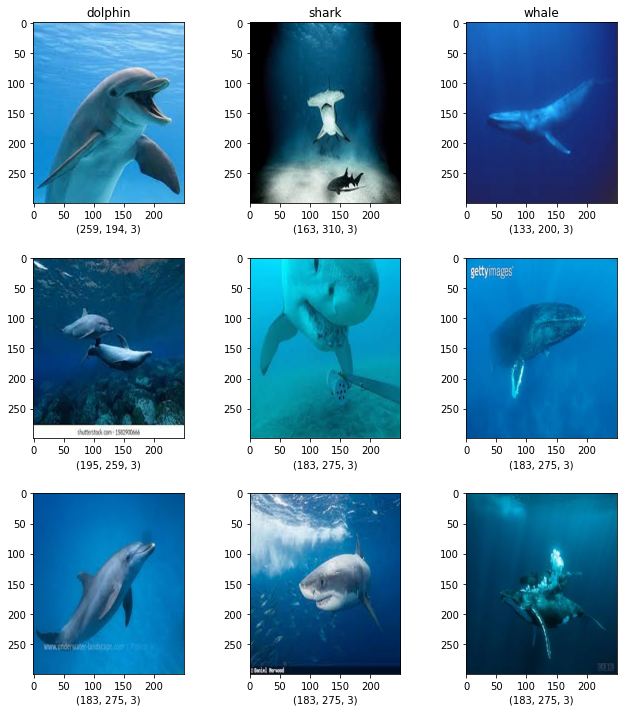

In [7]:
fig = plt.figure(figsize=(9,10))
[ax1,ax2,ax3] = fig.subplots(3,3)

dic = {'dolphin':dolphin_img_list, 'shark': shark_img_list, 'whale': whale_img_list}

for num, filename in enumerate(dic.values()):
  img = cv2.imread(filename[num])
  ax1[num].set_xlabel(img.shape)
  res = cv2.resize(img, dsize=(250,300), interpolation=cv2.INTER_CUBIC)
  ax1[num].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
  ax1[num].set_title(list(dic.keys())[num])

  img = cv2.imread(filename[num+1])
  ax2[num].set_xlabel(img.shape)
  res = cv2.resize(img, dsize=(250,300), interpolation=cv2.INTER_CUBIC)
  ax2[num].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
  

  img = cv2.imread(filename[num+2])
  ax3[num].set_xlabel(img.shape)
  res = cv2.resize(img, dsize=(250,300), interpolation=cv2.INTER_CUBIC)
  ax3[num].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
  
  
plt.tight_layout(h_pad=2, w_pad=3)

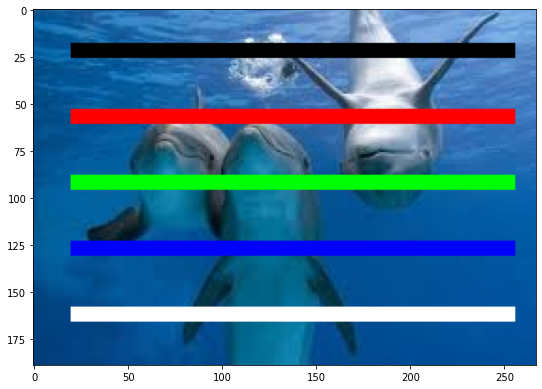

In [8]:
img = cv2.imread(random.choice(dolphin_img_list)) # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color_list = [[0, 0, 0], [0, 0, 255], [0, 255, 0], [255, 0, 0], [255, 255, 255]]

H_interval = int(img.shape[0]*0.1)
W_interval = int(img.shape[1]*0.1)

for i in range(len(color_list)):
    img[H_interval + (35*i) : W_interval + (35*i)][ : , 20:256] = color_list[i]

fig = plt.figure(figsize=(9,10))
ax1 = fig.subplots()                                              
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))